In [1]:
import pandas as pd
import numpy as np
import xlrd
import math
import statistics
import csv 
import operator
import scipy
from scipy import stats
import os
import io
from sklearn.ensemble import RandomForestClassifier

In [2]:
loc = (r'C:\Users\Rishabh Singhal\Desktop\python_code\ZS_challenge\data.csv') 
df = pd.read_csv (loc)
df.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [3]:
kk=df
kk.loc[:]['remaining_min'] = kk['remaining_min'].replace([np.nan],5)
kk.loc[:]['remaining_sec'] = kk['remaining_sec'].replace([np.nan],28)
kk.loc[:]['distance_of_shot'] = kk['distance_of_shot'].replace([np.nan],33)

In [4]:
kk['remaining_min.1'] = kk['remaining_min.1'].fillna(kk['remaining_min.1'].mean())
kk['remaining_sec.1'] = kk['remaining_sec.1'].fillna(kk['remaining_sec.1'].mean())
kk['distance_of_shot.1'] = kk['distance_of_shot.1'].fillna(kk['distance_of_shot.1'].mean())
kk['knockout_match.1'] = kk['knockout_match.1'].fillna(kk['knockout_match.1'].mean())
kk['power_of_shot.1'] = kk['power_of_shot.1'].fillna(kk['power_of_shot.1'].mean())

In [5]:
u=0
w = kk.iloc[4][19]
for i in range(0,len(kk)):
    if(kk.iloc[i][19]==w):
        u=u+1
        kk.iloc[i][19] = kk.iloc[i][20]


In [6]:
print(pd.value_counts(kk['power_of_shot']))
kk.loc[:]['power_of_shot'] = kk['power_of_shot'].replace([np.nan],3.0)
pd.value_counts(kk['power_of_shot'])

3.0    7885
1.0    7659
4.0    6910
2.0    6399
5.0     314
6.0      37
7.0       7
Name: power_of_shot, dtype: int64


3.0    9371
1.0    7659
4.0    6910
2.0    6399
5.0     314
6.0      37
7.0       7
Name: power_of_shot, dtype: int64

In [7]:
kk.loc[:]['knockout_match'] = kk['knockout_match'].replace([np.nan],0)
pd.value_counts(kk['knockout_match'])

0.0    26438
1.0     4259
Name: knockout_match, dtype: int64

In [8]:
kk.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.000000,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.000000,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.640000,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,18.204615,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,5.0,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.640000,2.0,0.000,19.0000,20.0


In [9]:
pp=kk.dropna(subset=['is_goal'])
pp.reset_index(drop=True, inplace=True)
print(pd.value_counts(pp['knockout_match']))

0.0    21046
1.0     3383
Name: knockout_match, dtype: int64


In [10]:
pp.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.000000,1.0,28.800,22.000000,35.0
1,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.640000,1.0,0.000,63.721600,54.4
2,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,18.204615,1.0,122.608,52.000000,42.0
3,4,155.0,0.0,0.0,5.0,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.640000,2.0,0.000,19.000000,20.0
4,5,244.0,-145.0,-11.0,9.0,3.0,0.0,NaN,32.0,34.0,...,"45.539131, -122.651648",shot - 17,NaN,20000012,1610612747,9.000000,3.0,0.000,39.027303,34.0


In [11]:
pp1 = df.isnull()

In [12]:
features = df.columns[:]
t = pd.DataFrame(columns = features)
#t
len(t)

0

In [13]:
m=0
for i in range(0,len(pp1)):
    if(pp1.iloc[i][10]):
        m=m+1
        tt = kk.iloc[i]
        t = t.append(kk.iloc[i][:])

In [14]:
print(len(t),m)

6268 6268


In [15]:
m = pd.DataFrame()
m['shot_id_number'] = t['Unnamed: 0']+1

In [16]:
m.head()

,shot_id_number
0,1
7,8
16,17
19,20
21,22


In [17]:
t2 = t
t2.reset_index(drop=True, inplace=True)

In [18]:
yy1 = pd.factorize(pp['area_of_shot'])
yy2 = pd.factorize(pp['shot_basics'])
yy3 = pd.factorize(pp['home/away'])
yy4 = pd.factorize(pp['range_of_shot'])
yy5 = pd.factorize(pp['type_of_shot'])
yy21 = pd.factorize(pp['type_of_combined_shot'])
yy7 = pp['distance_of_shot']
yy6 = pp['is_goal']
yy8 = pd.factorize(pp['game_season'])
yy9 = pp['remaining_min']
yy10 =pp['power_of_shot']
yy11 = pp['knockout_match']
yy12 = pp['remaining_sec']
yy13 = pd.factorize(pp['date_of_game'])
yy14 = pp['match_id']
yy15 = pp['team_id']
yy16 = pp['remaining_min.1']
yy17 = pp['power_of_shot.1']
yy18 = pp['knockout_match.1']
yy19 = pp['remaining_sec.1']
yy20 = pp['distance_of_shot.1']
yy22 = pd.factorize(pp['match_event_id'])

In [103]:
for i in range(0,len(yy1[0])):
    if(yy1[0][i] ==-1):
        res = statistics.mode(yy1[0]) 
        yy1[0][i] = res
    if(yy2[0][i] ==-1):
        res = statistics.mode(yy2[0]) 
        yy2[0][i] = res
    if(yy3[0][i] ==-1):
        res = statistics.mode(yy3[0]) 
        yy3[0][i] = res
    if(yy4[0][i] ==-1):
        res = statistics.mode(yy4[0]) 
        yy4[0][i] = res
    if(yy5[0][i] ==-1):
        res = statistics.mode(yy5[0]) 
        yy5[0][i] = res
    if(yy8[0][i] ==-1):
        res = statistics.mode(yy8[0]) 
        yy8[0][i] = res
    if(yy13[0][i] ==-1):
        res = statistics.mode(yy13[0]) 
        yy13[0][i] = res
    if(yy21[0][i] ==-1):
        res = statistics.mode(yy21[0]) 
        yy21[0][i] = res

In [19]:
s=pd.DataFrame()
s['area_of_shot']=yy1[0]
s['shot_basics']=yy2[0]
#s['home/away']=yy3[0]
s['range_of_shot']=yy4[0]
s['type_of_shot']=yy5[0]
s['distance_of_shot']=yy7
s['game_season']=yy8[0]
s['remaining_min']=yy9
s['power_of_shot']=yy10
#s['knockout_match']=yy11
#s['remaining_sec']=yy12
#s['date_of_game']=yy13[0]
#s['match_id']=yy14
#s['team_id']=yy15
#s['remaining_min.1']=yy16
#s['power_of_shot.1']=yy17
#s['knockout_match.1']=yy18
#s['remaining_sec.1']=yy19
#s['distance_of_shot.1']=yy20
#s['is_goal']=yy6
#s['match_event_id'] = yy22[0]

In [20]:
y1 = pd.factorize(kk['area_of_shot'])
y2 = pd.factorize(kk['shot_basics'])
y3 = pd.factorize(kk['home/away'])
y4 = pd.factorize(kk['range_of_shot'])

In [21]:
features = s.columns[:8]
features

Index(['area_of_shot', 'shot_basics', 'range_of_shot', 'type_of_shot',
       'distance_of_shot', 'game_season', 'remaining_min', 'power_of_shot'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(s[features], yy6, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [63]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [ ]:
clf = RandomForestClassifier(n_jobs=5,random_state=0,n_estimators=35000,max_depth=2,max_features=8)
clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [823]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

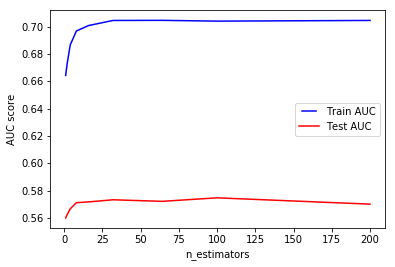

In [824]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [142]:
kk.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,5.0,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [114]:
u

0

In [ ]:
fgfg=kk.iloc[4][19]

In [ ]:
yy5 = pd.factorize(kk['type_of_shot'])

In [ ]:
max(yy5[0])

In [ ]:
yy21 = pd.factorize(kk['type_of_combined_shot'])

In [ ]:
for i in range(0,len(yy5[0])):
    if(yy5[0][i]== -1):
        yy5[0][i] =yy21[0][i]+57

In [ ]:
yy5[0][3]

In [ ]:
kk.loc[:]['type_of_shot'] = yy5[0]

In [ ]:
loc1 = (r'C:\Users\Rishabh Singhal\Desktop\python_code\ZS_challenge\sample_submission.csv') 
dss = pd.read_csv(loc1)

In [ ]:
#m

In [ ]:
len(t)

In [ ]:
t3 = pd.DataFrame()
t3 = t2
mm1 = pd.factorize(t2['area_of_shot'])
mm2 = pd.factorize(t2['shot_basics'])
#mm3 = pd.factorize(t2['home/away'])
mm4 = pd.factorize(t2['range_of_shot'])
mm5 = pd.factorize(t2['type_of_shot'])
#mm6 = pd.factorize(t2['game_season'])
#mm8 = pd.factorize(t2['date_of_game'])
mm7 = t2['distance_of_shot']
mm10 =t2['power_of_shot']
mm11 =t2['knockout_match']

In [ ]:
t3['area_of_shot'] = mm1[0]
t3['shot_basics'] = mm2[0]
#t3['home/away'] = mm3[0]
t3['range_of_shot'] = mm4[0]
t3['type_of_shot'] = mm5[0]
#t3['game_season'] = mm6[0]
#t3['date_of_game'] = mm8[0]
t3['distance_of_shot'] = mm7[0]
t3['power_of_shot'] = mm10[0]
t3['knockout_match'] = mm11[0]

In [ ]:
#features = s.columns[:8]
features
h=clf.predict(t3[features])

In [ ]:
m['is_goal'] = h

In [83]:
t3.isnull().sum()

Unnamed: 0                  0
match_event_id            323
location_x                305
location_y                295
remaining_min               0
power_of_shot               0
knockout_match              0
game_season              1230
remaining_sec               0
distance_of_shot            0
is_goal                  6268
area_of_shot                0
shot_basics                 0
range_of_shot               0
team_name                 323
date_of_game              313
home/away                 283
shot_id_number            313
lat/lng                   318
type_of_shot                0
type_of_combined_shot    3124
match_id                    0
team_id                     0
remaining_min.1             0
power_of_shot.1             0
knockout_match.1            0
remaining_sec.1             0
distance_of_shot.1          0
dtype: int64

In [84]:
features = s.columns[:19]
features

Index(['area_of_shot', 'shot_basics', 'range_of_shot', 'type_of_shot',
       'distance_of_shot', 'game_season', 'remaining_min', 'power_of_shot'],
      dtype='object')

In [571]:
train =s[features]
max_features = list(range(1,train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [572]:
max_features

[1, 2, 3, 4, 5]

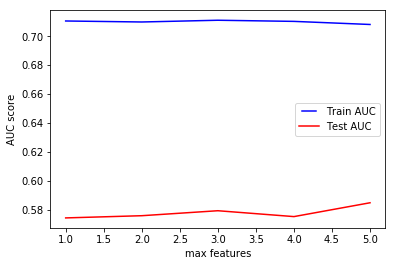

In [573]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [403]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
#import xgboost
from sklearn.model_selection import train_test_split

#Split the Data into Training and Testing sets with test size as #30%
X_train, X_test, y_train, y_test = train_test_split(s[features],yy6,test_size=0.2, shuffle=True)

In [405]:
classifiers = []
#model1 = xgboost.XGBClassifier()
#classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [414]:
i=0
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s",(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    i=i+1
#    break
 #   print("Confusion Matrix of %s is %s"%(clf, cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of %s is %s (SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False), 0.5624232501023332)
Accuracy of %s is %s (DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 0.5480966025378633)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of %s is %s (RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 0.5732705689725747)


In [407]:
classifiers

[SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
             oob_score=False, random_state=None, verbose=0

In [809]:
g = pd.DataFrame()
g['shot_id_number']=dss['shot_id_number']
g['is_goal']=y

In [810]:
g.to_csv('submission_4.csv', index = False)